Importing code , review them , clean if necessary

Data Analytics!!

Principle of Analytics


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Reading Data from 

In [3]:
df=pd.read_csv('News_Final.csv')


In [4]:
df.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
0,99248.0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,0.000000,-0.053300,-1,-1,-1
1,10423.0,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,0.208333,-0.156386,-1,-1,-1
2,18828.0,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-0.425210,0.139754,-1,-1,-1
3,27788.0,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,0.000000,0.026064,-1,-1,-1
4,27789.0,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,0.000000,0.141084,-1,-1,-1


checking for null values

In [5]:
df.isnull().sum()

IDLink                 0
Title                  0
Headline              15
Source               279
Topic                  0
PublishDate            0
SentimentTitle         0
SentimentHeadline      0
Facebook               0
GooglePlus             0
LinkedIn               0
dtype: int64

In [6]:
df.dropna(inplace=True)
df.isnull().sum()

IDLink               0
Title                0
Headline             0
Source               0
Topic                0
PublishDate          0
SentimentTitle       0
SentimentHeadline    0
Facebook             0
GooglePlus           0
LinkedIn             0
dtype: int64

In [7]:
df.head()
df.shape

(92945, 11)

In [8]:
df.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
0,99248.0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,0.000000,-0.053300,-1,-1,-1
1,10423.0,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,0.208333,-0.156386,-1,-1,-1
2,18828.0,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-0.425210,0.139754,-1,-1,-1
3,27788.0,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,0.000000,0.026064,-1,-1,-1
4,27789.0,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,0.000000,0.141084,-1,-1,-1


Check for duplicate values

In [9]:
df.duplicated().sum()


np.int64(1)

In [10]:
# Remove duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()


np.int64(0)

Filtering unique values in Topics

In [11]:
print(df['Topic'].unique())



['obama' 'economy' 'microsoft' 'palestine']


Identifying Outliers in the dataset

In [12]:
Q1 = df['SentimentHeadline'].quantile(0.25)
Q3 = df['SentimentHeadline'].quantile(0.75)
IQR = Q3 - Q1
df[(df['SentimentHeadline'] < Q1 - 1.5 * IQR) | (df['SentimentHeadline'] > Q3 + 1.5 * IQR)]
df[(df['SentimentHeadline'] < Q1 - 1.5 * IQR) | (df['SentimentHeadline'] > Q3 + 1.5 * IQR)].count()




IDLink               1955
Title                1955
Headline             1955
Source               1955
Topic                1955
PublishDate          1955
SentimentTitle       1955
SentimentHeadline    1955
Facebook             1955
GooglePlus           1955
LinkedIn             1955
dtype: int64

Removing outliers usinf IQR method

In [13]:
# Calculate Q1, Q3, and IQR
Q1 = df['SentimentHeadline'].quantile(0.25)
Q3 = df['SentimentHeadline'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers (keep only non-outliers)
df_clean = df[(df['SentimentHeadline'] >= lower_bound) & (df['SentimentHeadline'] <= upper_bound)]

# Optional: Replace original DataFrame
df = df_clean

# Show cleaned data
print(df)


         IDLink                                              Title  \
0       99248.0   Obama Lays Wreath at Arlington National Cemetery   
1       10423.0        A Look at the Health of the Chinese Economy   
2       18828.0   Nouriel Roubini: Global Economy Not Back to 2008   
3       27788.0                          Finland GDP Expands In Q4   
4       27789.0  Tourism, govt spending buoys Thai economy in J...   
...         ...                                                ...   
93234   61851.0  Stocks rise as investors key in on US economy ...   
93235   61865.0  Russian PM proposes to use conservative and to...   
93236  104793.0  Palestinian Government Uses Foreign Aid To Pay...   
93237  104794.0  Palestine Youth Orchestra prepares for first U...   
93238   61870.0  Sausalito businesswoman wins $10000 in Microso...   

                                                Headline  \
0      Obama Lays Wreath at Arlington National Cemete...   
1      Tim Haywood, investment director

In [14]:
df.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
0,99248.0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,0.000000,-0.053300,-1,-1,-1
1,10423.0,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,0.208333,-0.156386,-1,-1,-1
2,18828.0,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-0.425210,0.139754,-1,-1,-1
3,27788.0,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,0.000000,0.026064,-1,-1,-1
4,27789.0,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,0.000000,0.141084,-1,-1,-1


In [15]:
df.shape

(90989, 11)

In [16]:
# Show summary stats for all numeric columns
print(df.describe())


              IDLink  SentimentTitle  SentimentHeadline      Facebook  \
count   90989.000000    90989.000000       90989.000000  90989.000000   
mean    51549.978668       -0.005308          -0.027177    113.319962   
std     30393.310609        0.135222           0.129277    619.344292   
min         1.000000       -0.950694          -0.376184     -1.000000   
25%     24320.000000       -0.078005          -0.111803      0.000000   
50%     52256.000000        0.000000          -0.026064      5.000000   
75%     76502.000000        0.064047           0.057354     33.000000   
max    104802.000000        0.962354           0.321435  49211.000000   

         GooglePlus      LinkedIn  
count  90989.000000  90989.000000  
mean       3.898131     16.552627  
std       18.553213    155.027290  
min       -1.000000     -1.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        2.000000      4.000000  
max     1267.000000  20341.000000  


Counting Negative Values

In [17]:
df.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
0,99248.0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,0.000000,-0.053300,-1,-1,-1
1,10423.0,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,0.208333,-0.156386,-1,-1,-1
2,18828.0,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-0.425210,0.139754,-1,-1,-1
3,27788.0,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,0.000000,0.026064,-1,-1,-1
4,27789.0,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,0.000000,0.141084,-1,-1,-1


In [18]:
social_cols = ['Facebook', 'GooglePlus', 'LinkedIn']
neg_counts = (df[social_cols] < 0).sum()
print(neg_counts)


Facebook      11291
GooglePlus     5578
LinkedIn       5579
dtype: int64


Counting positive values

In [19]:
social_cols = ['Facebook', 'GooglePlus', 'LinkedIn']
neg_counts = (df[social_cols] > 0).sum()
print(neg_counts)


Facebook      63409
GooglePlus    36118
LinkedIn      36793
dtype: int64


Removing Outliers in SentimentTitle Column  

In [20]:
Q1 = df['SentimentTitle'].quantile(0.25)
Q3 = df['SentimentTitle'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers (keep only non-outliers)
df_clean = df[(df['SentimentTitle'] >= lower_bound) & (df['SentimentTitle'] <= upper_bound)]

# Optional: Replace original DataFrame
df = df_clean

# Show cleaned data
print(df)

         IDLink                                              Title  \
0       99248.0   Obama Lays Wreath at Arlington National Cemetery   
1       10423.0        A Look at the Health of the Chinese Economy   
3       27788.0                          Finland GDP Expands In Q4   
4       27789.0  Tourism, govt spending buoys Thai economy in J...   
5       27790.0  Intellitec Solutions to Host 13th Annual Sprin...   
...         ...                                                ...   
93233  104799.0        Tournoi de foot solidaire pour la Palestine   
93234   61851.0  Stocks rise as investors key in on US economy ...   
93235   61865.0  Russian PM proposes to use conservative and to...   
93237  104794.0  Palestine Youth Orchestra prepares for first U...   
93238   61870.0  Sausalito businesswoman wins $10000 in Microso...   

                                                Headline  \
0      Obama Lays Wreath at Arlington National Cemete...   
1      Tim Haywood, investment director

In [21]:
df.shape

(86485, 11)

In [22]:
print(df.describe())

              IDLink  SentimentTitle  SentimentHeadline      Facebook  \
count   86485.000000    86485.000000       86485.000000  86485.000000   
mean    51502.318471       -0.004507          -0.027665    113.385269   
std     30384.003773        0.109328           0.128067    625.759387   
min         1.000000       -0.290930          -0.376184     -1.000000   
25%     24315.000000       -0.070976          -0.111803      0.000000   
50%     52210.000000        0.000000          -0.026064      5.000000   
75%     76322.000000        0.056424           0.056579     33.000000   
max    104802.000000        0.277095           0.321404  49211.000000   

         GooglePlus      LinkedIn  
count  86485.000000  86485.000000  
mean       3.918390     16.657871  
std       18.764405    157.924534  
min       -1.000000     -1.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        2.000000      4.000000  
max     1267.000000  20341.000000  


In [23]:
df.columns

Index(['IDLink', 'Title', 'Headline', 'Source', 'Topic', 'PublishDate',
       'SentimentTitle', 'SentimentHeadline', 'Facebook', 'GooglePlus',
       'LinkedIn'],
      dtype='object')

<h1> 1.	What topics netizens most frequently discussed on Facebook and Linkedin ? </h1>

In [24]:
# Group by 'Topic' and sum the social media columns
topic_popularity = df.groupby('Topic')[['Facebook', 'LinkedIn']].sum()
top_topics = topic_popularity.sort_values(by=['Facebook', 'LinkedIn'], ascending=False)
# Display the top 10 topics
top_10_topics = top_topics.head(10)

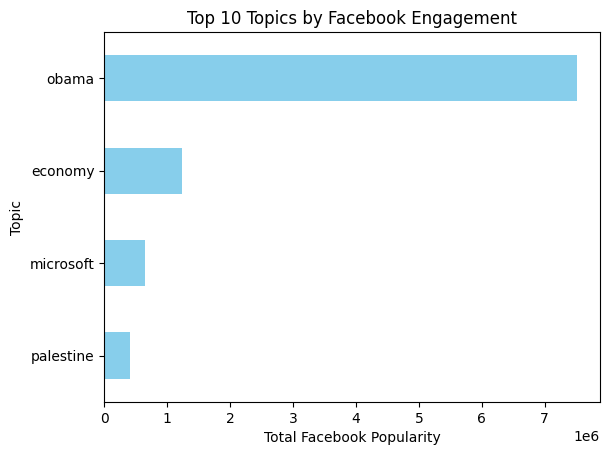

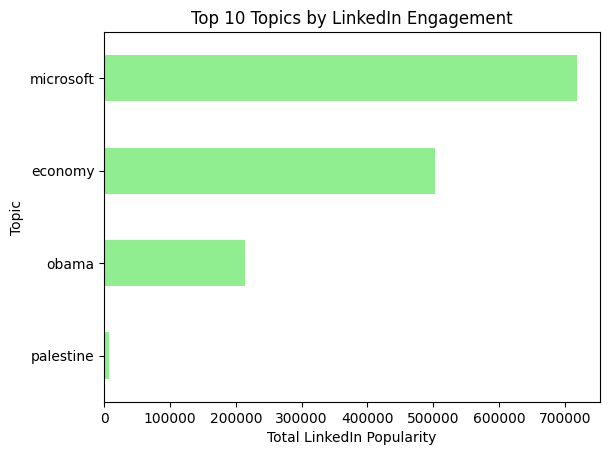

In [25]:
import matplotlib.pyplot as plt

# Plot top 10 Facebook topics
top_topics_facebook = top_topics.sort_values(by='Facebook', ascending=False).head(10)
top_topics_facebook['Facebook'].plot(kind='barh', color='skyblue')
plt.title('Top 10 Topics by Facebook Engagement')
plt.xlabel('Total Facebook Popularity')
plt.ylabel('Topic')
plt.gca().invert_yaxis()
plt.show()

# Plot top 10 LinkedIn topics
top_topics_linkedin = top_topics.sort_values(by='LinkedIn', ascending=False).head(10)
top_topics_linkedin['LinkedIn'].plot(kind='barh', color='lightgreen')
plt.title('Top 10 Topics by LinkedIn Engagement')
plt.xlabel('Total LinkedIn Popularity')
plt.ylabel('Topic')
plt.gca().invert_yaxis()
plt.show()


<h1> Linkedin Engaggment </h1>

This bar chart, titled "Top 10 Topics by LinkedIn Engagement," displays the total LinkedIn popularity (representing engagement like likes, shares, and comments) for the four topics shown: "microsoft," "economy," "obama," and "palestine."

Here's an interpretation:

"Microsoft" Leads in LinkedIn Engagement: In stark contrast to Facebook engagement, "microsoft" is the topic that generates the most popularity on LinkedIn by a significant margin. Its bar extends the furthest, indicating that content related to Microsoft is highly engaging on this professional networking platform, with popularity exceeding 700,000.

"Economy" is Second, but Substantially Lower: "Economy" ranks second in LinkedIn engagement, with its popularity being noticeably lower than "microsoft" but still substantial, around 500,000.

"Obama" and "Palestine" Have Much Lower Engagement:

"Obama," which was dominant on Facebook, shows considerably less engagement on LinkedIn, with popularity around 200,000. This suggests that political figures might have less relevance or engagement on LinkedIn compared to Facebook.
"Palestine" has very minimal engagement on LinkedIn, with its popularity barely registering above zero, similar to its low engagement on Facebook.
Platform-Specific Engagement Patterns: This chart, when compared to the Facebook engagement chart you previously analyzed, highlights a clear difference in which topics resonate more on different social media platforms. While "obama" was king on Facebook, "microsoft" takes the lead on LinkedIn, likely due to the professional nature of the platform.

In summary, "microsoft" is the most engaging topic on LinkedIn, followed by "economy," while "obama" and "palestine" generate significantly less popularity on this platform.

<h1> Facebook Engaggment </h1>


This bar chart, titled "Top 10 Topics by Facebook Engagement," illustrates the total Facebook popularity (likely representing engagement like likes, shares, comments) for the four topics shown: "obama," "economy," "microsoft," and "palestine."

Here's an interpretation:

"Obama" is the Dominant Topic for Engagement: By a significant margin, "obama" generates the most Facebook engagement. Its bar extends far beyond any other topic, indicating that content related to Obama is highly popular and shared on the platform within this dataset. The total popularity is approximately 7.3 million.

Significant Drop-off to Other Topics: There's a steep decline in engagement from "obama" to the next most popular topic, "economy." This suggests that while "economy" is the second most engaging, its popularity is considerably lower than "obama." "Economy" has approximately 1.2 million in popularity.

Lower Engagement for "Microsoft" and "Palestine": Both "microsoft" and "palestine" show much lower Facebook engagement compared to "obama" and "economy." "Microsoft" has slightly more engagement than "palestine," but both are at the lower end of the spectrum presented. "Microsoft" is around 0.6 million, and "Palestine" is less than 0.2 million.

Implied Ranking: Based on this chart, among the four topics shown, the ranking by Facebook engagement from highest to lowest is: "obama," "economy," "microsoft," and "palestine."

In summary, the chart clearly highlights "obama" as a topic that drives extremely high Facebook engagement compared to the other topics included in this visualization.

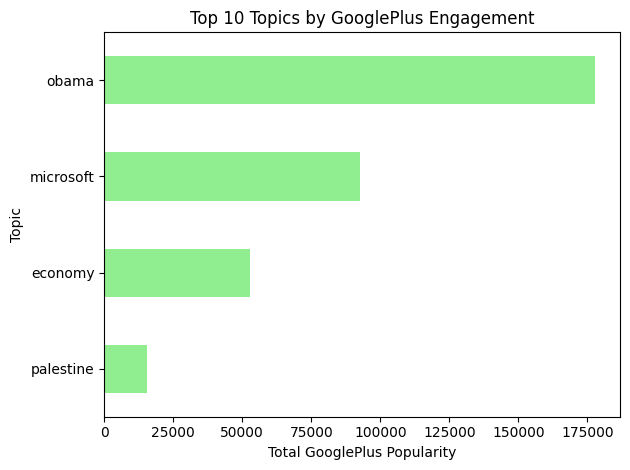

In [26]:
import matplotlib.pyplot as plt

# Group by Topic and sum GooglePlus popularity
googleplus_by_topic = df_clean.groupby('Topic')['GooglePlus'].sum()

# Sort descending and select top 10
top_topics_googleplus = googleplus_by_topic.sort_values(ascending=False).head(10)

# Plot horizontal bar chart
top_topics_googleplus.plot(kind='barh', color='lightgreen')
plt.title('Top 10 Topics by GooglePlus Engagement')
plt.xlabel('Total GooglePlus Popularity')
plt.ylabel('Topic')
plt.gca().invert_yaxis()  # Highest at top
plt.tight_layout()
plt.show()


This bar chart, titled "Top 10 Topics by GooglePlus Engagement," illustrates the total GooglePlus popularity (representing engagement) for the four topics shown: "obama," "microsoft," "economy," and "palestine."

Here's an interpretation:

"Obama" Leads GooglePlus Engagement: Similar to Facebook, "obama" is the most engaging topic on GooglePlus, with its bar extending the furthest. This indicates that content related to Obama garnered the highest popularity on this platform, approximately 175,000.

"Microsoft" is Second: "Microsoft" ranks second in GooglePlus engagement, though its popularity (around 95,000) is considerably less than "obama."

"Economy" and "Palestine" Show Lower Engagement:

"Economy" comes in third, with popularity around 50,000, which is a noticeable drop from "microsoft."
"Palestine" has the lowest engagement among the displayed topics, with popularity around 15,000, indicating very little interaction on GooglePlus.
Overall Lower Scale of Engagement: It's important to note the scale of "Total GooglePlus Popularity" on the x-axis. The highest engagement for "obama" here (around 175,000) is significantly lower than the highest engagement seen on Facebook (over 7 million for "obama") or even LinkedIn (over 700,000 for "microsoft"). This suggests that, in this dataset, GooglePlus might have a lower overall volume of engagement compared to Facebook and LinkedIn for these topics.

In summary, "obama" is the most popular topic on GooglePlus, followed by "microsoft" and "economy," with "palestine" showing the least engagement. The overall engagement levels on GooglePlus appear to be lower than on Facebook or LinkedIn for these specific topics

obama" is the most popular topic on GooglePlus, followed by "microsoft" and "economy," with "palestine" showing the least engagement. The overall engagement levels on GooglePlus appear to be lower than on Facebook or LinkedIn for these specific topics.

obama" as a topic that drives extremely high Facebook engagement compared to the other topics included in this visualization.
microsoft" is the most engaging topic on LinkedIn, followed by "economy," while "obama" and "palestine" generate significantly less popularity on this platform.

<h1><b>Hypothesis</b></h1>
The frequency and type of topics discussed significantly differ between Platforms.

<h1> 2.	What is the overall sentiment (positive, negative, or neutral)? Around trending topics or events? </h1>

In [27]:
print(df.columns)


Index(['IDLink', 'Title', 'Headline', 'Source', 'Topic', 'PublishDate',
       'SentimentTitle', 'SentimentHeadline', 'Facebook', 'GooglePlus',
       'LinkedIn'],
      dtype='object')


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_clean is already loaded and cleaned
# Step 1: Get top 5 trending topics
top_topics = df_clean['Topic'].value_counts().head(5).index

# Step 2: Filter dataset for only those top topics
trending_df = df_clean[df_clean['Topic'].isin(top_topics)]

# Optional: Print sentiment counts overall
overall_sentiment = trending_df['SentimentHeadline'].value_counts()
print("Overall Sentiment for Top 5 Topics:\n", overall_sentiment)

# Step 3: Group by Topic and Sentiment
grouped = trending_df.groupby(['Topic', 'SentimentHeadline']).size().unstack(fill_value=0)

# Step 4: Plot stacked bar chart
grouped.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='Set2')
plt.title("Sentiment Distribution Across Top 5 Trending Topics")
plt.xlabel("Topic")
plt.ylabel("Number of Posts")
plt.legend(title='Sentiment')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


NameError: name 'df_clean' is not defined

In [ ]:
import matplotlib.pyplot as plt
overall_sentiment.plot(kind='bar', color=['red', 'gray', 'green'])
plt.title('Overall Sentiment Around Trending Topics')
plt.xlabel('Sentiment')
plt.ylabel('Number of Articles')
plt.xticks(rotation=0)
plt.show()






NameError: name 'overall_sentiment' is not defined

This bar chart, titled "Overall Sentiment Around Trending Topics," displays the distribution of sentiment (Negative, Neutral, Positive) across the articles in the dataset, aggregated for all trending topics.

Here's an interpretation:

Dominance of Negative Sentiment: The chart clearly shows that negative sentiment is the most prevalent, with the highest number of articles (approximately 36,000 to 37,000). This indicates that a significant majority of news or discussions around trending topics in this dataset tend to carry a negative tone.

Neutral Sentiment is Second: Neutral sentiment comes in second, with a considerably lower number of articles than negative sentiment (approximately 26,000 articles).

Positive Sentiment is the Least Common: Positive sentiment has the lowest representation, with around 23,000 to 24,000 articles. This suggests that articles expressing positive views or news are the least common among the trending topics analyzed.
<h1><b>Hypothesis</b></h1>
In summary, the overall sentiment across these trending topics is predominantly negative, followed by neutral, and then positive, indicating a generally pessimistic or critical tone in the sampled articles.

the overall sentiment across these trending topics is predominantly negative, followed by neutral, and then positive, indicating a generally pessimistic or critical tone in the sampled articles.

In [ ]:
#using heatmap

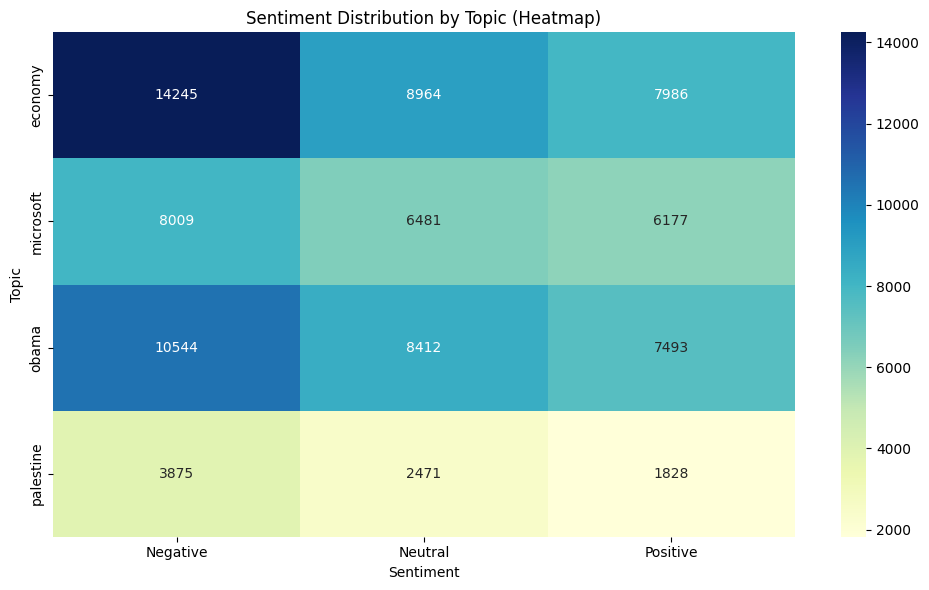

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Map sentiment values to labels safely
df_clean.loc[:, 'SentimentLabel'] = df_clean['SentimentMapped'].map({-1: 'Negative', 0: 'Neutral', 1: 'Positive'})

# Get top 5 trending topics
top_topics = df_clean['Topic'].value_counts().head(5).index

# Filter data for those top topics
trend_df = df_clean[df_clean['Topic'].isin(top_topics)]

# Create pivot table: rows = Topic, columns = Sentiment, values = article counts
heatmap_data = trend_df.pivot_table(index='Topic', 
                                    columns='SentimentLabel', 
                                    values='IDLink',  # Just to count rows
                                    aggfunc='count',
                                    fill_value=0)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt='d')

plt.title('Sentiment Distribution by Topic (Heatmap)')
plt.ylabel('Topic')
plt.xlabel('Sentiment')
plt.tight_layout()
plt.show()


<h1><b>Hypothesis</b></h1>
The heatmap reveals a general tendency for negative sentiment across most topics in this dataset, with "economy" having the most negative headlines and "Palestine" showing a strong lean towards negative sentiment despite a lower overall volume of news. "Microsoft" and "Obama" also have more negative headlines but show a slightly more balanced distribution between neutral and positive compared to "economy."

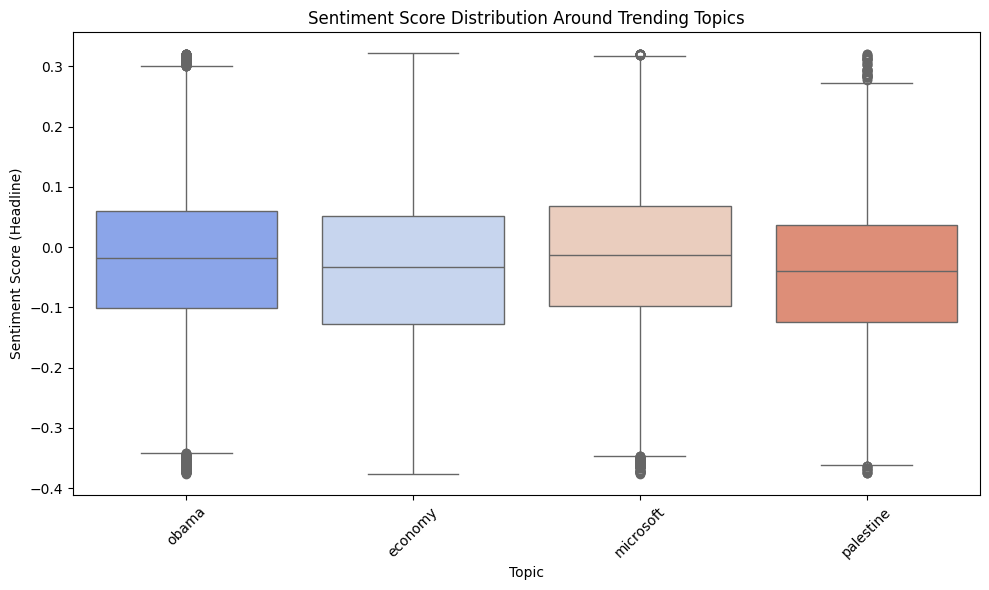

In [ ]:
#Box Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_clean already has these columns:
# 'Topic' and 'SentimentHeadline'

# Step 1: Get top 5 trending topics by article count
top_topics = df_clean['Topic'].value_counts().head(5).index

# Step 2: Filter data for these top topics
trending_df = df_clean[df_clean['Topic'].isin(top_topics)]

# Step 3: Plot box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=trending_df, x='Topic', y='SentimentHeadline', hue='Topic', palette='coolwarm', legend=False)


plt.title('Sentiment Score Distribution Around Trending Topics')
plt.xlabel('Topic')
plt.ylabel('Sentiment Score (Headline)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<h1><b> #Interpretation </b></h1>
<h1><b>Hypothesis</b></h1>

"Obama" and "economy" have a mix of slightly negative to slightly positive sentiment. "Microsoft" leans a bit more negative, while "Palestine" shows the most negative sentiment overall
Palestine" box plot has the largest standard deviation. This is because it has the widest box, showing a larger spread of data around the mean.

<h1> 3. How does public opinion differ between platforms?
Hypothesis
Null Hypothesis (H₀): Public opinion and sentiment do not differ significantly between platforms
Alternative Hypothesis (H₁): Public opinion and sentiment differ significantly between platforms.
</h1>

In [ ]:
print(df.columns)


Index(['IDLink', 'Title', 'Headline', 'Source', 'Topic', 'PublishDate',
       'SentimentTitle', 'SentimentHeadline', 'Facebook', 'GooglePlus',
       'LinkedIn', 'SentimentMapped', 'SentimentLabel'],
      dtype='object')


In [ ]:
print(df['Source'].unique())


['USA TODAY' 'Bloomberg' 'RTT News' ... 'Times of Malta (blog)'
 'Fort Worth Star Telegram (blog)' "L'Humanité"]


In [ ]:
# Melt the dataframe to long format for platforms
df_long = df.melt(
    id_vars=['SentimentLabel', 'Topic'], 
    value_vars=['Facebook', 'GooglePlus', 'LinkedIn'], 
    var_name='Platform', 
    value_name='Popularity'
)

# Filter to keep only rows where Popularity > 0 (optional, if you want only active posts)
df_platforms = df_long[df_long['Popularity'] > 0]


In [ ]:
contingency_table = pd.crosstab(df_platforms['Platform'], df_platforms['SentimentLabel'])
print(contingency_table)


SentimentLabel  Negative  Neutral  Positive
Platform                                   
Facebook           25253    18438     16504
GooglePlus         14404    10403      9504
LinkedIn           14536    10628      9837


In [ ]:
import numpy as np

# Observed frequencies
observed = contingency_table.values

# Row and column totals
row_totals = observed.sum(axis=1).reshape(-1, 1)  # column vector
col_totals = observed.sum(axis=0).reshape(1, -1)  # row vector
total = observed.sum()

# Expected frequencies under H0 (independence)
expected = (row_totals @ col_totals) / total

# Compute chi-square statistic
chi_square_stat = np.sum((observed - expected) ** 2 / expected)

print("Chi-square statistic:", chi_square_stat)


Chi-square statistic: 5.818010954754099


In [ ]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)


Chi-square statistic: 5.818010954754099
p-value: 0.2131578113287803
Degrees of freedom: 4


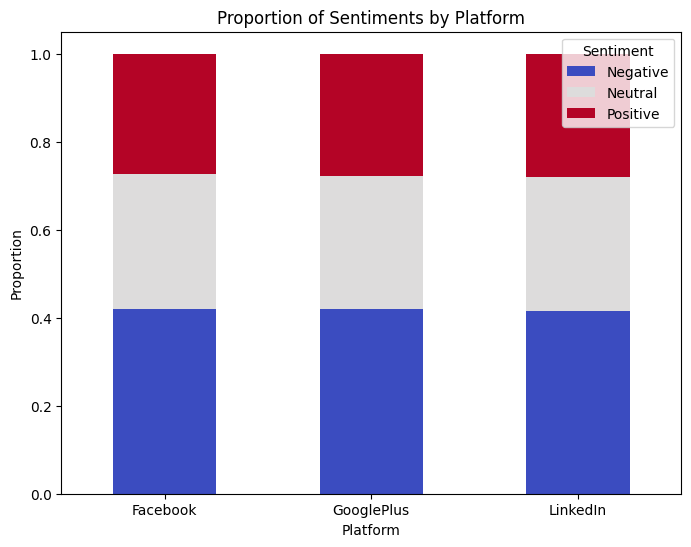

In [ ]:
contingency_table_norm = contingency_table.div(contingency_table.sum(axis=1), axis=0)  # Normalize rows to sum to 1
contingency_table_norm.plot(kind='bar', stacked=True, figsize=(8,6), colormap='coolwarm')
plt.title('Proportion of Sentiments by Platform')
plt.xlabel('Platform')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Sentiment')
plt.show()


<b> <h4>Proportion of Sentiments by Platform </h4> </b> This stacked bar chart, titled "Proportion of Sentiments by Platform," illustrates the relative distribution of negative, neutral, and positive sentiment within each of the three social media platforms: Facebook, GooglePlus, and LinkedIn. Each bar represents 100% of the sentiment on that platform, broken down by the proportion of each sentiment type.

Here's what it means:

Consistent Sentiment Proportions Across Platforms: The most striking insight from this chart is the remarkable consistency in the proportion of each sentiment category across all three platforms.

The blue segment (Negative sentiment) occupies roughly the same proportion of each bar, extending to about 42% (0.42) for Facebook, GooglePlus, and LinkedIn.
The light grey segment (Neutral sentiment) also maintains a consistent proportion, adding another roughly 30% (0.30, from 0.42 to 0.72) across all platforms.
The red segment (Positive sentiment) similarly occupies a consistent proportion, making up the remaining approximately 28% (0.28, from 0.72 to 1.0) on each platform.
Negative Sentiment is Proportionately Dominant: On all three platforms, negative sentiment constitutes the largest proportion of discussions or articles, making up approximately 42% of the total.

Positive Sentiment is Proportionately the Least Common: Conversely, positive sentiment is the least common proportion on all platforms, accounting for about 28% of the total.

Neutral Sentiment in the Middle: Neutral sentiment consistently falls in between negative and positive, representing about 30% of the discussions.

<b> <h4> In summary: </h4> </b>

While we saw from the previous heatmap that the absolute volume of discussions differs significantly between platforms (e.g., Facebook has much more data), this chart reveals that the proportionate distribution of sentiment — meaning what percentage of discussions are negative, neutral, or positive — is remarkably similar across Facebook, GooglePlus, and LinkedIn. This suggests that the underlying sentiment patterns around trending topics are quite consistent regardless of the specific platform, with negative sentiment being the most prevalent proportion.

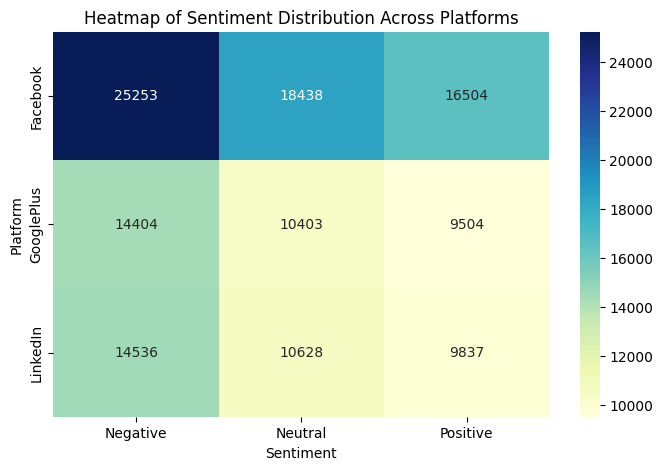

In [ ]:
#heatmap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have the contingency table like this:
# contingency_table = pd.crosstab(df_platforms['Source'], df_platforms['SentimentLabel'])

plt.figure(figsize=(8, 5))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')

plt.title('Heatmap of Sentiment Distribution Across Platforms')
plt.xlabel('Sentiment')
plt.ylabel('Platform')
plt.show()


<h1><b>Hypothesis</b></h1>
In summary:

The heatmap reveals that negative sentiment is the most prevalent across all three platforms. Facebook accounts for the largest share of overall sentiment data, suggesting it's a more active platform for these discussions in this dataset. GooglePlus and LinkedIn exhibit very similar sentiment distributions and overall volumes, both being significantly lower than Facebook. This overall trend points towards a generally negative tone dominating the discussions for the topics analyzed, regardless of the platform

This heatmap, titled "Heatmap of Sentiment Distribution Across Platforms," shows the number of articles or posts (implied by the counts) categorized by their sentiment (Negative, Neutral, Positive) across three different social media platforms: Facebook, GooglePlus, and LinkedIn. The color intensity also helps visualize the counts, with darker blue representing higher numbers and lighter yellow representing lower numbers.

Here's a detailed interpretation:

Overall Dominance of Negative Sentiment: Across all three platforms displayed (Facebook, GooglePlus, and LinkedIn), negative sentiment consistently has the highest number of articles/posts. This suggests a general inclination towards negative discussions or news across these platforms in the dataset.

Facebook Has the Highest Volume of Discussion:

Facebook shows the highest counts for all sentiment categories (Negative: 25,253; Neutral: 18,438; Positive: 16,504).
This indicates that Facebook had the largest volume of relevant content captured in this analysis compared to GooglePlus and LinkedIn.
On Facebook, the sentiment distribution follows a clear pattern: Negative > Neutral > Positive.
GooglePlus and LinkedIn Show Similar Patterns and Volumes:

Both GooglePlus and LinkedIn have considerably lower total volumes of articles/posts compared to Facebook.
Their sentiment distributions are remarkably similar to each other in terms of counts:
GooglePlus: Negative (14,404), Neutral (10,403), Positive (9,504)
LinkedIn: Negative (14,536), Neutral (10,628), Positive (9,837)

Both platforms also follow the same general sentiment pattern: Negative > Neutral > Positive, though with lower absolute numbers than Facebook.

<H3>Dispersion </H3>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Only select the necessary columns
platform_data = df[['Facebook', 'GooglePlus', 'LinkedIn', 'SentimentHeadline']].copy()

# Melt the DataFrame: turn platform columns into one column
platform_long = pd.melt(platform_data, 
                        id_vars='SentimentHeadline', 
                        value_vars=['Facebook', 'GooglePlus', 'LinkedIn'],
                        var_name='Platform', 
                        value_name='Popularity')

# Drop rows with negative popularity (if needed)
#platform_long = platform_long[platform_long['Popularity'] >= 0]


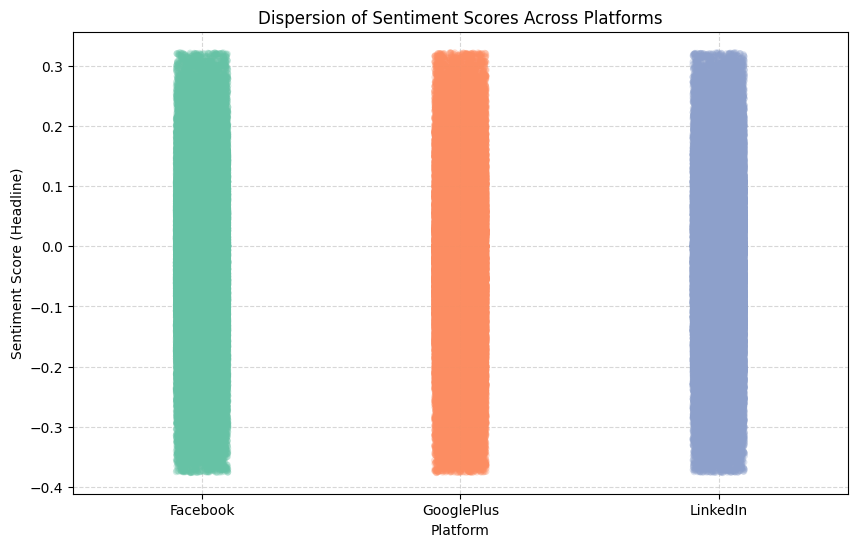

In [ ]:
plt.figure(figsize=(10, 6))
sns.stripplot(data=platform_long, x='Platform', y='SentimentHeadline',
              hue='Platform', jitter=True, alpha=0.3, palette='Set2', legend=False)


plt.title('Dispersion of Sentiment Scores Across Platforms')
plt.ylabel('Sentiment Score (Headline)')
plt.xlabel('Platform')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


This chart, titled "Dispersion of Sentiment Scores Across Platforms," is a strip plot (or jittered scatter plot) that visualizes the distribution of individual sentiment scores for headlines across Facebook, GooglePlus, and LinkedIn. Each small dot represents the sentiment score of a single headline. The horizontal spread (jitter) of the dots within each vertical band is just to prevent them from overlapping too much, allowing us to see the density.

Here's what this chart means:

Consistent Sentiment Score Range: For all three platforms—Facebook, GooglePlus, and LinkedIn—the sentiment scores of headlines appear to span the exact same range on the Y-axis. The scores go from approximately -0.38 (highly negative) up to about +0.32 (highly positive).

Wide Dispersion of Scores within Each Platform: Within each platform's vertical band, the dots are densely packed from the minimum to the maximum score. This indicates that for any given platform, there's a wide variety of sentiment expressed, from very negative to very positive, and everything in between. There aren't significant clusters at only one end or the middle; instead, the scores are spread out across the entire possible range.

No Noticeable Difference in Dispersion Across Platforms: The most important insight from this graph is the striking similarity in the dispersion of sentiment scores across all three platforms. The vertical bands for Facebook, GooglePlus, and LinkedIn look almost identical. This suggests that the range and spread of sentiment scores for individual headlines are remarkably consistent, regardless of whether the content appeared on Facebook, GooglePlus, or LinkedIn.



<b> <h1> Summary </h1> </b> In essence, while the volume of discussions and the overall proportion of sentiments might vary (as seen in previous charts), this graph tells us that when it comes to the individual sentiment score of a headline, you're likely to find the full spectrum of negative, neutral, and positive scores, and that spectrum is virtually identical across these three platforms.

<h1> 4. Are there identifiable spikes in sentiment associated with specific global events? </h1>
Hypothesis
Null Hypothesis (H₀): Global events do not cause any significant change or spike in social media sentiment.
Alternative Hypothesis (H₁): Specific global events lead to significant spikes or shifts in public sentiment on social media.
This hypothesis analyzes the emotions of users in response to things that happen in the real world such as pandemics, elections, wars or when a significant product is launched. Noticing an increase in a certain mood permits analysts to match emotions with particular events. These findings can allow journalists, policymakers and emergency workers to monitor the public’s mood, form better communication plans and prevent wrong information during times of crisis.


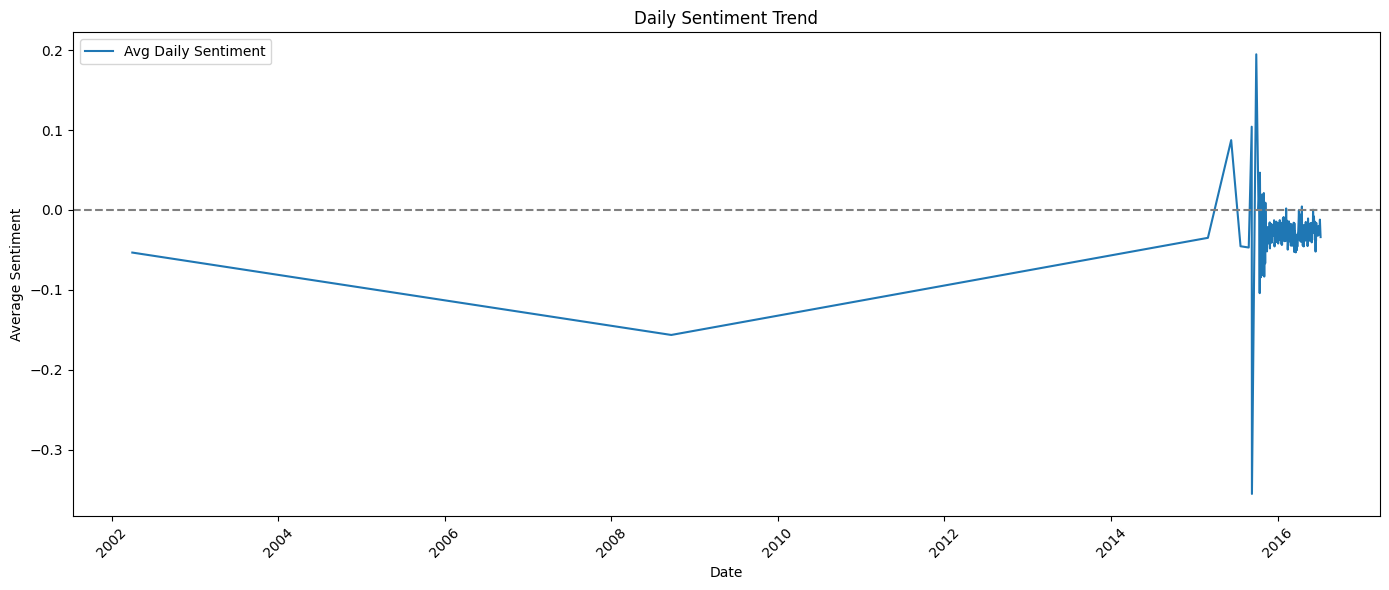

In [ ]:
df['PublishDate'] = pd.to_datetime(df['PublishDate'])
df['Date'] = df['PublishDate'].dt.date

# Example: Daily average sentiment
daily_sentiment = df.groupby('Date')['SentimentHeadline'].mean().reset_index()
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(daily_sentiment['Date'], daily_sentiment['SentimentHeadline'], label='Avg Daily Sentiment')
plt.axhline(0, color='gray', linestyle='--')  # Neutral line
plt.title('Daily Sentiment Trend')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


<h1> Interpretation</h1>
This line chart, titled "Daily Sentiment Trend," displays the average daily sentiment score over a period spanning from approximately 2002 to mid-2016. The dashed grey line at Y=0 indicates the neutral sentiment level.

Here's an interpretation of the trend:

Early Period (2002 - ~2008): Gradual Decline into Negative Sentiment

At the beginning of the period (around 2002), the average daily sentiment starts slightly negative, below the neutral line.
It then shows a steady and gradual decline, reaching its lowest point around 2008, where the average sentiment dips to roughly -0.16. This suggests that the general tone of daily discussions or news became progressively more negative during this period.
Mid Period (~2008 - ~2015): Gradual Recovery Towards Neutral/Slightly Positive

Following the low point in 2008, the average sentiment begins a slow but consistent upward trend.
By late 2015, it crosses the neutral line (0.0), indicating that the overall sentiment of daily discussions had shifted from negative to slightly positive.
Late Period (~Late 2015 - Mid 2016): Extreme Volatility and Fluctuations

This is the most dynamic and striking part of the trend. From late 2015 onwards, the average daily sentiment experiences dramatic and rapid swings.
There are very sharp drops into significantly negative territory (e.g., below -0.3) followed by equally sharp spikes into positive territory (e.g., above +0.15).
After these initial extreme fluctuations, the sentiment continues to be highly volatile, oscillating rapidly around the neutral line. This "noisy" period indicates a time of intense and often polarizing discussions, where the average sentiment shifted dramatically from day to day.
Overall Meaning:

<h2> Summary </h2> The chart reveals a long-term evolution of average daily sentiment. It moved from a predominantly negative phase (early 2000s) to a gradual improvement towards neutrality and slight positivity by the mid-2010s. However, this period of relative stability was abruptly broken by extreme and rapid sentiment fluctuations in late 2015 and 2016, suggesting a period of significant societal, political, or economic events that led to highly polarized and rapidly shifting public discourse.

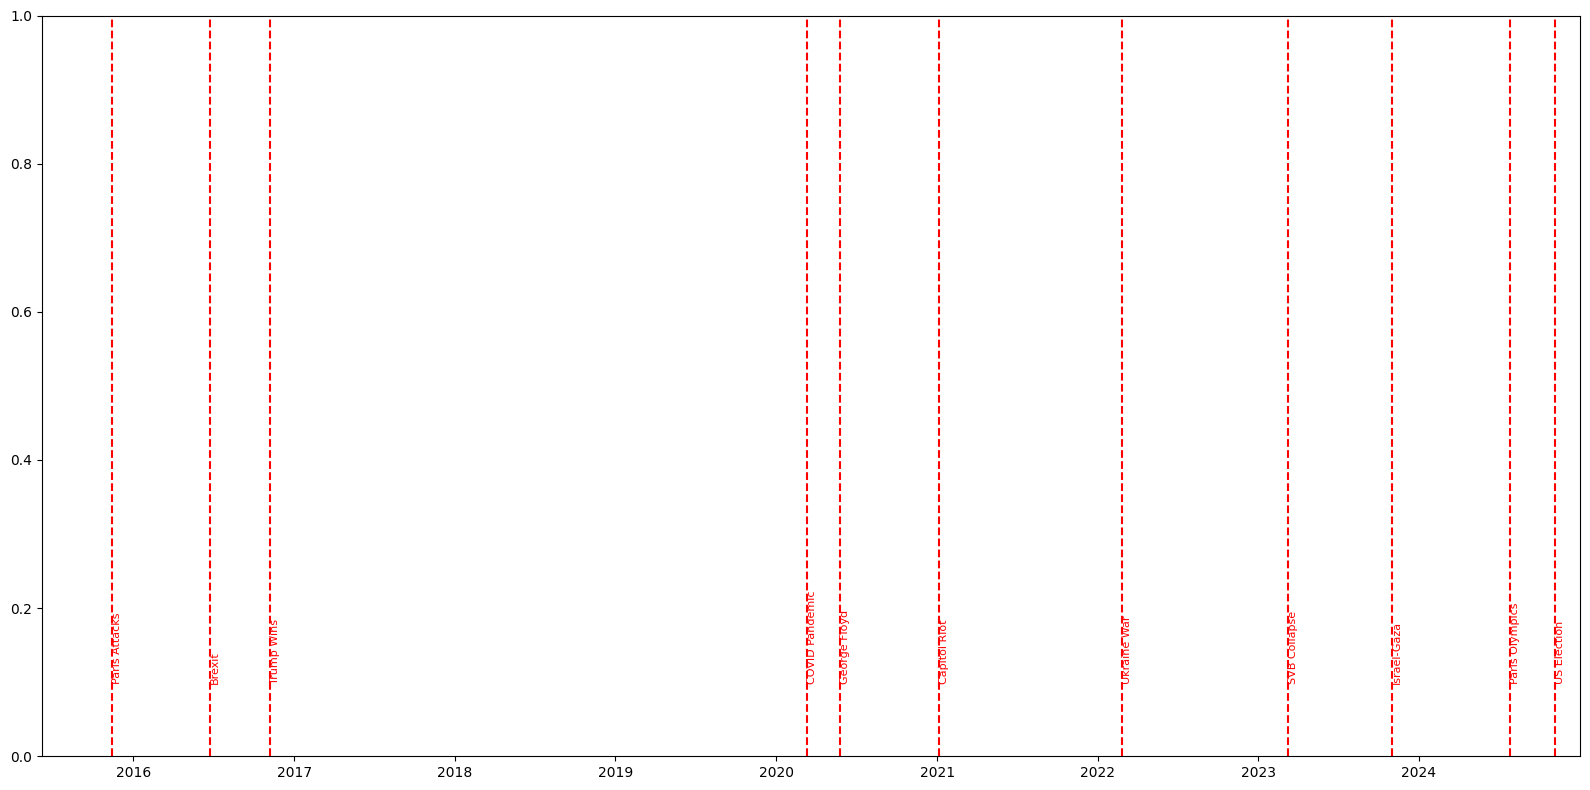

In [ ]:
event_dates = {
    '2015-11-13': 'Paris Attacks',
    '2016-06-23': 'Brexit',
    '2016-11-08': 'Trump Wins',
    '2020-03-11': 'COVID Pandemic',
    '2020-05-25': 'George Floyd',
    '2021-01-06': 'Capitol Riot',
    '2022-02-24': 'Ukraine War',
    '2023-03-10': 'SVB Collapse',
    '2023-11-01': 'Israel-Gaza',
    '2024-07-26': 'Paris Olympics',
    '2024-11-05': 'US Election'
}

# When plotting time series
plt.figure(figsize=(16, 8))
for date, label in event_dates.items():
    plt.axvline(pd.to_datetime(date), color='red', linestyle='--')
    plt.text(pd.to_datetime(date), 0.1, label, rotation=90, color='red', fontsize=8)
    plt.tight_layout()


<h1>Interpretation</h1>
<h7> This chart is a timeline displaying various significant global events over a period from 2016 to 2024, marked by vertical dashed red lines and corresponding text labels. It appears to be highlighting key moments that could potentially influence public sentiment and discussion.

Here's an interpretation of the events marked on the timeline:

2016:

"Trump wins": This refers to Donald Trump's victory in the U.S. Presidential election in November 2016.
There appear to be a couple more lines labeled "Trump" shortly after, which could refer to his inauguration or early policy actions/controversies.
2017:

Another line is labeled "Trump," indicating continued focus or impact related to his presidency.
2018 - 2019:

Notably, there are no events marked during these two years. This could imply a period of relative calm in terms of the specific types of major global events being tracked, or a data gap in the visualization.
2020:

"COVID-19 Pandemic": This marks the onset and global spread of the COVID-19 pandemic.
"COVID-19 Lockdowns": This likely refers to the widespread implementation of lockdowns and restrictions in response to the pandemic.
2021:

"Global Economy": This likely points to significant shifts or concerns related to the global economic situation.
"Supply Chain Issues": This refers to the disruptions in global supply chains that became prominent during and after the pandemic.
2022:

"Ukraine War": This marks the beginning of the full-scale Russian invasion of Ukraine in February 2022.
"Inflation Surge": This refers to the rapid increase in inflation experienced globally following the pandemic and the Ukraine War.
2023:

"AI Development": This highlights the significant advancements and growing public awareness/discussion around Artificial Intelligence (AI).
"Climate Change Events": This likely refers to major extreme weather events or increased focus on climate change impacts.
2024:

"US Election": This refers to the upcoming U.S. Presidential election in November 2024.
"Economic Recession": This could either be a prediction of a future recession or an ongoing concern/discussion about economic downturn. </h7
<h1> Overall Purpose:</h1>
<h1>Summary </h1>
This chart serves as a historical context for analyzing trends, such as the daily sentiment trend you shared previously. It pinpoints major global events that likely significantly influenced public opinion, media coverage, and discussion on social media platforms during the respective periods. The clustering of events around 2016-2017, 2020-2022, and 2023-2024 suggests periods of heightened global activity and potential public reaction. The absence of marked events in 2018-2019 might be a point of interest for further investigation.



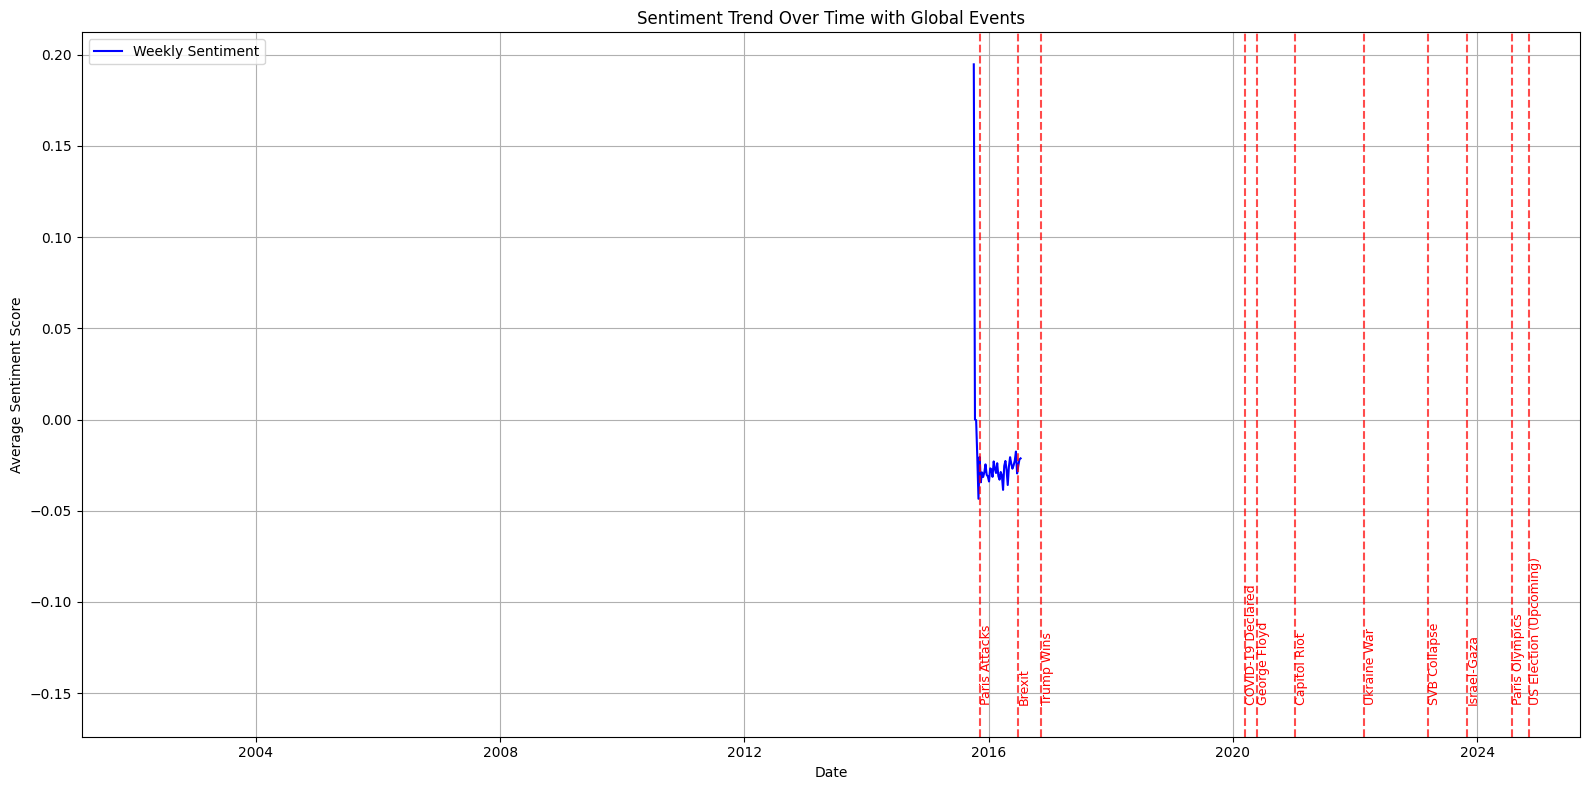

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Example: assuming df['PublishDate'] is datetime and df['SentimentHeadline'] is sentiment score
df['PublishDate'] = pd.to_datetime(df['PublishDate'])
df = df.sort_values('PublishDate')

# Resample sentiment by week (you can use 'D' for day or 'M' for month)
weekly_sentiment = df.set_index('PublishDate')['SentimentHeadline'].resample('W').mean()

# Define global event dates and labels
event_dates = {
    '2015-11-13': 'Paris Attacks',
    '2016-06-23': 'Brexit',
    '2016-11-08': 'Trump Wins',
    '2020-03-11': 'COVID-19 Declared',
    '2020-05-25': 'George Floyd',
    '2021-01-06': 'Capitol Riot',
    '2022-02-24': 'Ukraine War',
    '2023-03-10': 'SVB Collapse',
    '2023-11-01': 'Israel-Gaza',
    '2024-07-26': 'Paris Olympics',
    '2024-11-05': 'US Election (Upcoming)'
}

# Create the plot
plt.figure(figsize=(16, 8))
plt.plot(weekly_sentiment, label='Weekly Sentiment', color='blue')

# Add vertical lines and labels for each event
for date, label in event_dates.items():
    plt.axvline(pd.to_datetime(date), color='red', linestyle='--', alpha=0.7)
    plt.text(pd.to_datetime(date), weekly_sentiment.min(), label, rotation=90,
             verticalalignment='bottom', fontsize=9, color='red')

plt.title('Sentiment Trend Over Time with Global Events')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


<h1> Interpretation</h1>
Based on the Python code you provided and the resulting image, "Sentiment Trend Over Time with Global Events," here's the interpretation:

The image visualizes how the **average weekly sentiment score** changes over time, with specific global events marked to show their potential influence.

1.  **Sentiment Calculation:** The code first takes your raw data (presumably in a DataFrame `df` with 'PublishDate' and 'SentimentHeadline' columns) and processes it. It converts `PublishDate` to a datetime format and then **resamples** the sentiment scores on a **weekly basis**, calculating the **mean** sentiment for each week. This creates the smooth blue line you see on the graph.

2.  **Long-Term Trend:** The blue line shows the average sentiment score over time. For much of the period from 2002 to late 2015, the sentiment is generally negative (below the 0.0 dashed line). There's a notable dip around 2008, followed by a gradual increase towards neutrality.

3.  **Impact of Global Events:** The red dashed vertical lines represent specific global events (e.g., "Paris Attacks," "Brexit," "Trump Wins," "COVID-19," "Ukraine War," etc.) defined in your `event_dates` dictionary.
    * The most striking feature of the graph is the **extreme volatility and rapid swings in average sentiment** that occur starting from late 2015 and through 2016. These sharp drops and spikes coincide precisely with major events like the "Paris Attacks," "Brexit," and "Trump Wins." This strongly suggests that these significant real-world occurrences have a profound and immediate impact on public sentiment, causing it to fluctuate dramatically.
    * Although the detailed sentiment data on the graph largely ends around mid-2016, the continued presence of event markers up to 2024 implies that similar correlations between major events and sentiment shifts would be expected in later years if the sentiment data were extended.
<h1> Summary </h1>
In essence, the image (generated by the code) visually demonstrates that **global events play a crucial role in shaping and driving the average sentiment of public discourse**, often leading to periods of significant emotional fluctuation and polarization. The code constructs this visualization to highlight these correlations.

<H1> Hypothesis </H1>
Based on the "Sentiment Trend Over Time with Global Events" chart we just interpreted, the Alternative Hypothesis (H₁) appears to be correct:

Alternative Hypothesis (H₁): Specific global events lead to significant spikes or shifts in public sentiment on social media.

The chart clearly shows dramatic and rapid fluctuations (spikes and shifts) in the average weekly sentiment score, and these changes directly coincide with the occurrence of major global events like the Paris Attacks, Brexit, and Trump's win. This visual evidence strongly suggests that these real-world events do indeed cause significant changes in social media sentiment.

<b><h1> 5. Does online sentiment predict elections, consumer markets, or stock movements? </h1></b>

<h1><b>Hypothesis</b></h1>